In [163]:
import pandas as pd
import numpy as np

In [164]:
rsv = pd.read_csv('books.csv', error_bad_lines=False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [165]:
rsv.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [166]:
fn = rsv.authors.unique()
thresh = 0
writers = dict()
for f in fn:
    fc = rsv[rsv.authors == f].bookID.count() 
    if fc >= thresh: 
        writers[f] = fc

In [167]:
import matplotlib.pyplot as plt

In [168]:
writers = dict(sorted(writers.items(), key=lambda item: item[1], reverse=True)[:10])

## Simple Counting of writers
Thus obtained graph is shown as follows
showing that P.G. Woodhouse and Stephen King are equally dominating

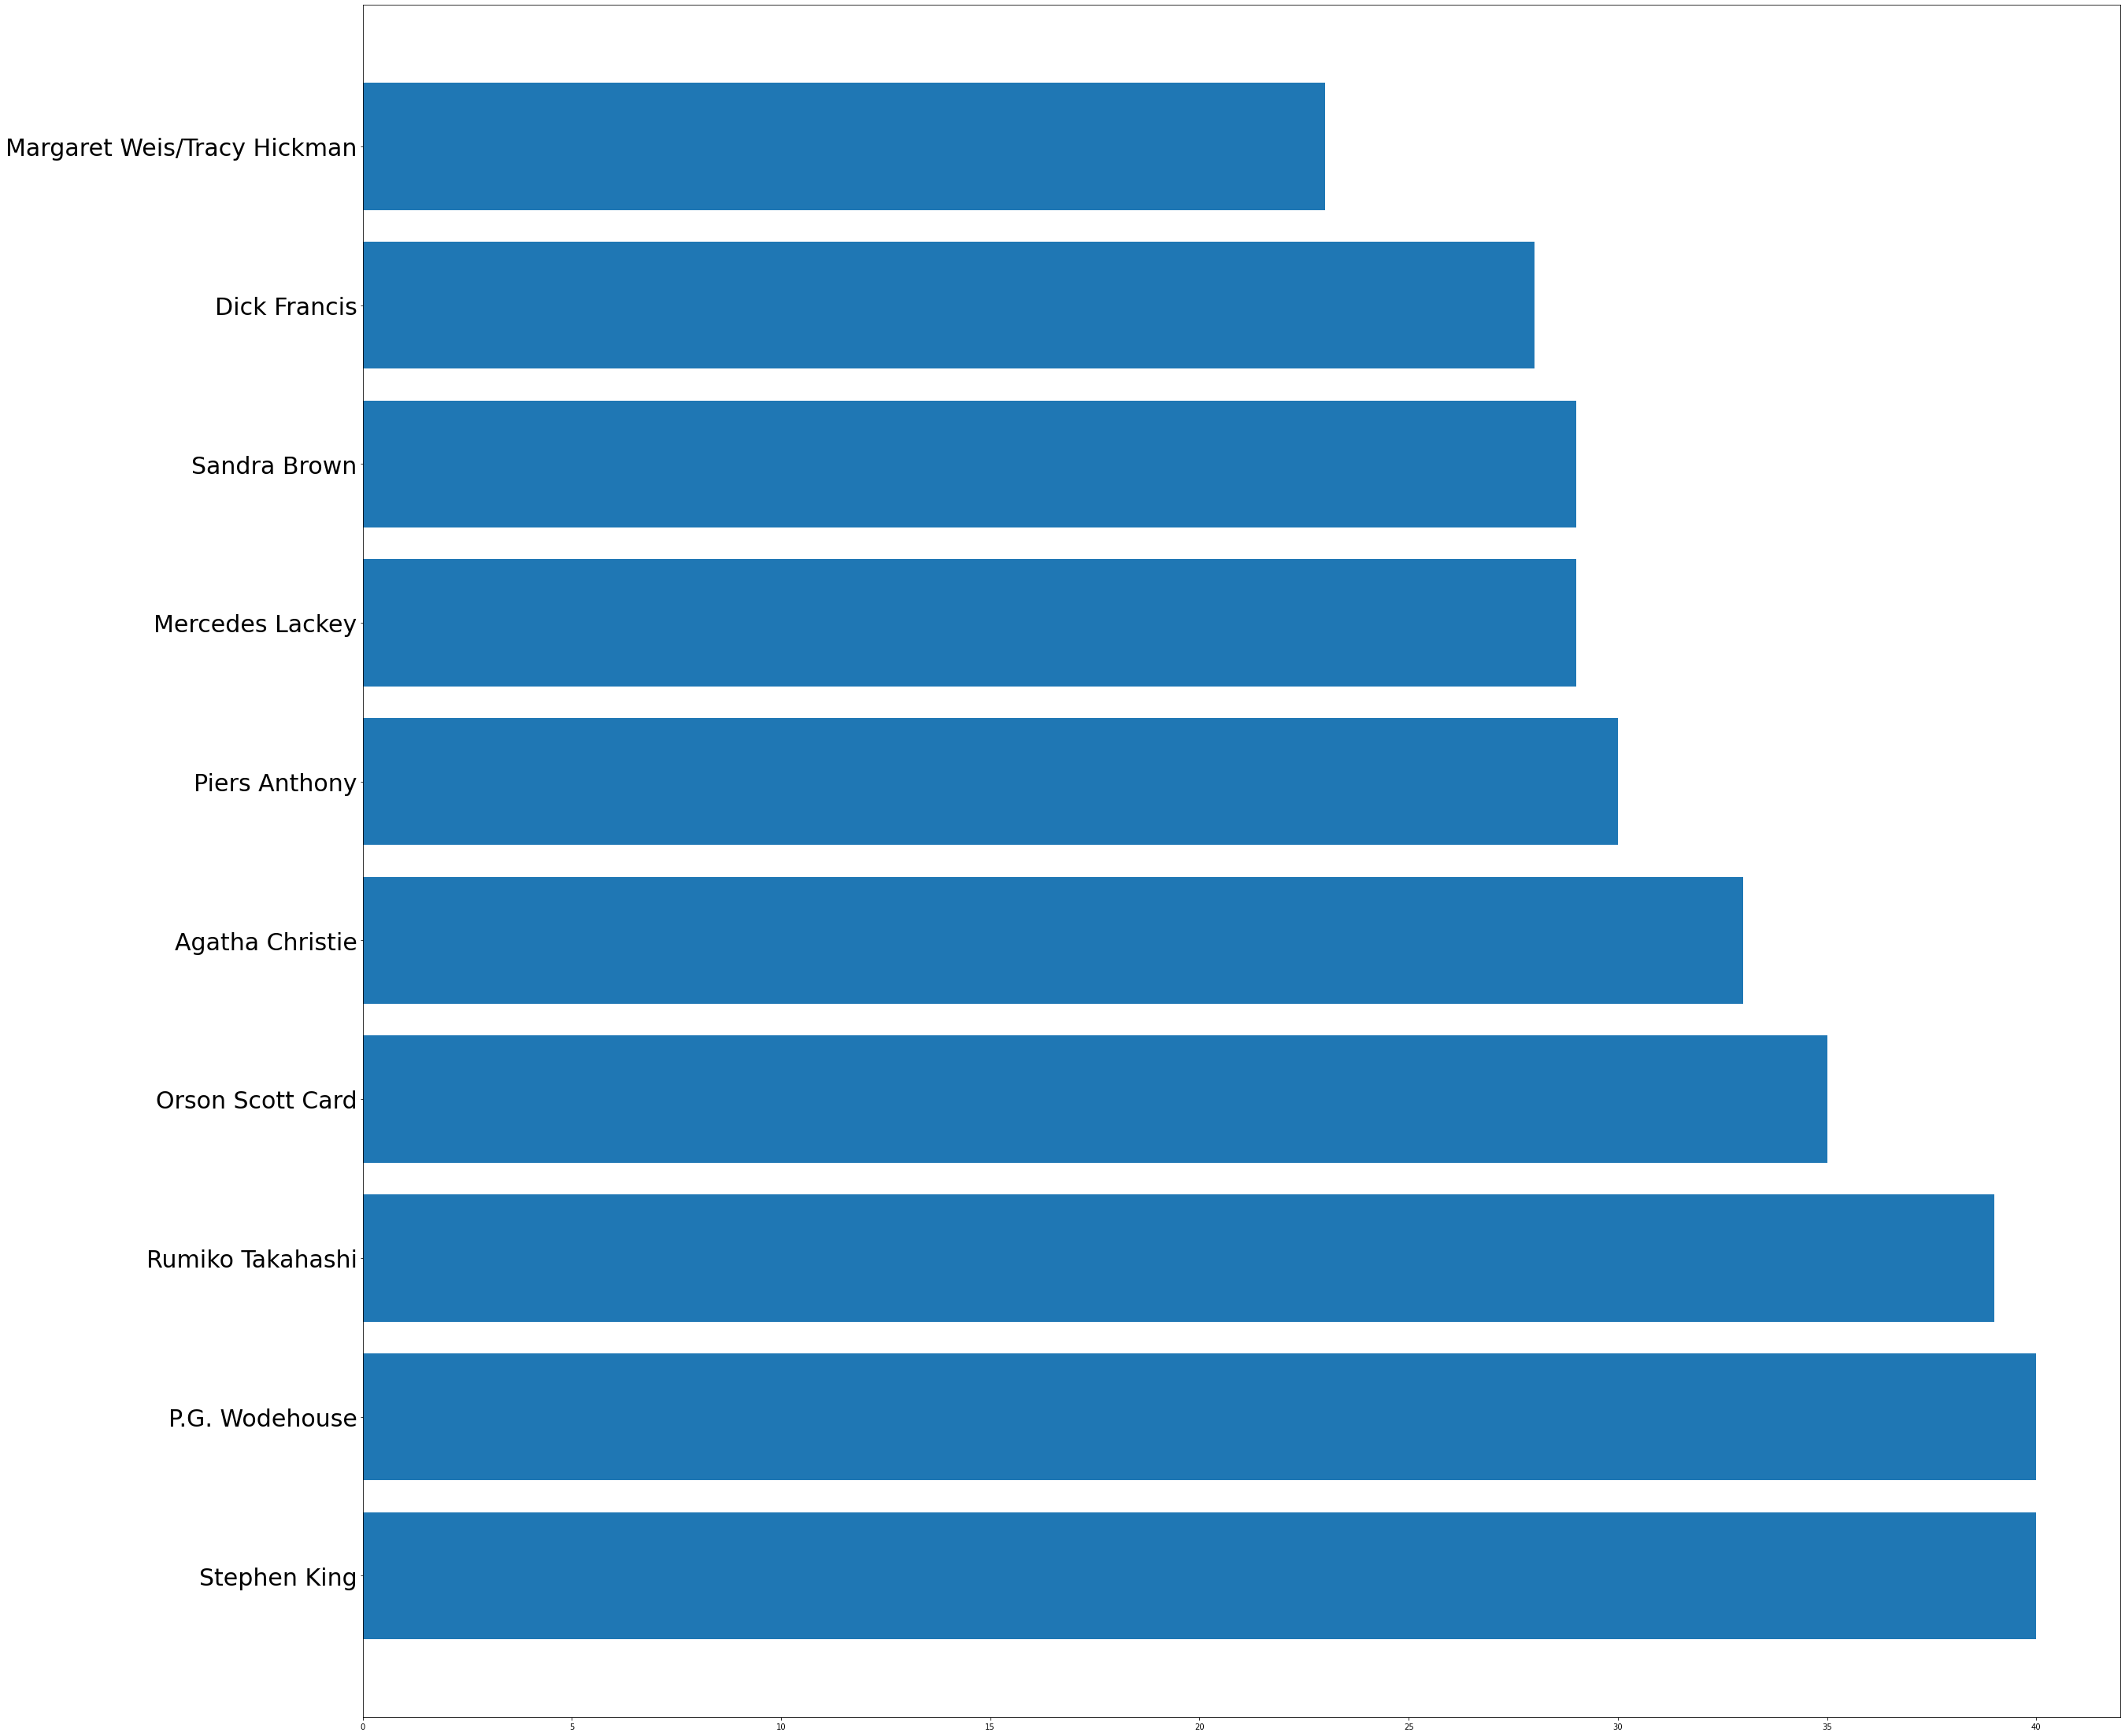

In [169]:
plt.figure(figsize=(40, 40))
plt.barh(range(len(writers)), list(writers.values()), align='center')
plt.yticks(range(len(writers)), list(writers.keys()), fontsize=30)
plt.show();

In [170]:
writers

{'Stephen King': 40,
 'P.G. Wodehouse': 40,
 'Rumiko Takahashi': 39,
 'Orson Scott Card': 35,
 'Agatha Christie': 33,
 'Piers Anthony': 30,
 'Mercedes Lackey': 29,
 'Sandra Brown': 29,
 'Dick Francis': 28,
 'Margaret Weis/Tracy Hickman': 23}

# Question mark 
ON the Authors columns, Clearly multiple authors are seprated by a "/" which is "incorrect" for direct
data analysis. So after figuring out a "function" which does the following:->
* It looks for '/' in the authors
* Seprates them if normally acessed
* But if the book is already seen, maximum number of writers are considered
* Hence we find that actual count was incorrect
* Also includes single writers


In [171]:
title_arr = []
writers_arr = []
single_writer = []
for f in fn:
    if '/' in f:
        try:
            book = rsv[rsv.authors == f].title.values[0]
            if book in title_arr:
                if len(writers_arr[title_arr.index(book)]) < len(f.split('/')):
                    writers_arr[title_arr.index(book)] = f.split('/')
            else:
                title_arr.append(book)
                writers_arr.append(f.split('/'))
        except IndexError:
            title_arr.append(rsv[rsv.authors == f].title.values[0])
            writers_arr.append(f.split('/'))

In [172]:
len(title_arr)

3563

In [173]:
len(title_arr)

3563

In [174]:
len(set(title_arr))

3563

In [175]:
unique_writes = set()
count = 0
max_len = 0
for x,y  in zip(title_arr, writers_arr):
    if len(y) > max_len:
        max_len = len(y)
    for z in y:
        unique_writes.add(z)
        count+=1

In [176]:
for k in writers.keys():
    if '/' not in k:
        unique_writes.add(k)
        count+=1

In [177]:
len(unique_writes)

7123

In [178]:
count

10464

In [179]:
get_books = dict.fromkeys(unique_writes, 0)

In [180]:
for x,y in zip(title_arr, writers_arr):
    for z in y:
        get_books[z]+=1

In [181]:
for x in writers.items():
    if '/' not in x[0]:
        get_books[x[0]]+=x[1]

## Looking into Titles
We find that twilight has maximum reviews and rating of 3.59
Although max rating among top 10 is of Harry Potter and Half blood Prince

In [182]:
rsv.sort_values(by=['ratings_count'],
                ascending=False).loc[:,("title","average_rating")][:10]

,title,average_rating
10336,Twilight (Twilight #1),3.59
1697,The Hobbit or There and Back Again,4.27
1462,The Catcher in the Rye,3.80
307,Angels & Demons (Robert Langdon #1),3.89
3,Harry Potter and the Prisoner of Azkaban (Harr...,4.56
4415,Harry Potter and the Chamber of Secrets (Harry...,4.42
1,Harry Potter and the Order of the Phoenix (Har...,4.49
23,The Fellowship of the Ring (The Lord of the Ri...,4.36
2114,Animal Farm,3.93
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57


In [183]:
get_books = dict(sorted(get_books.items(), key=lambda item: item[1], reverse=True))

## The correct visualization
The visualization is perfect as everything is taken into account, hence Seeing Stephen King as a dominant

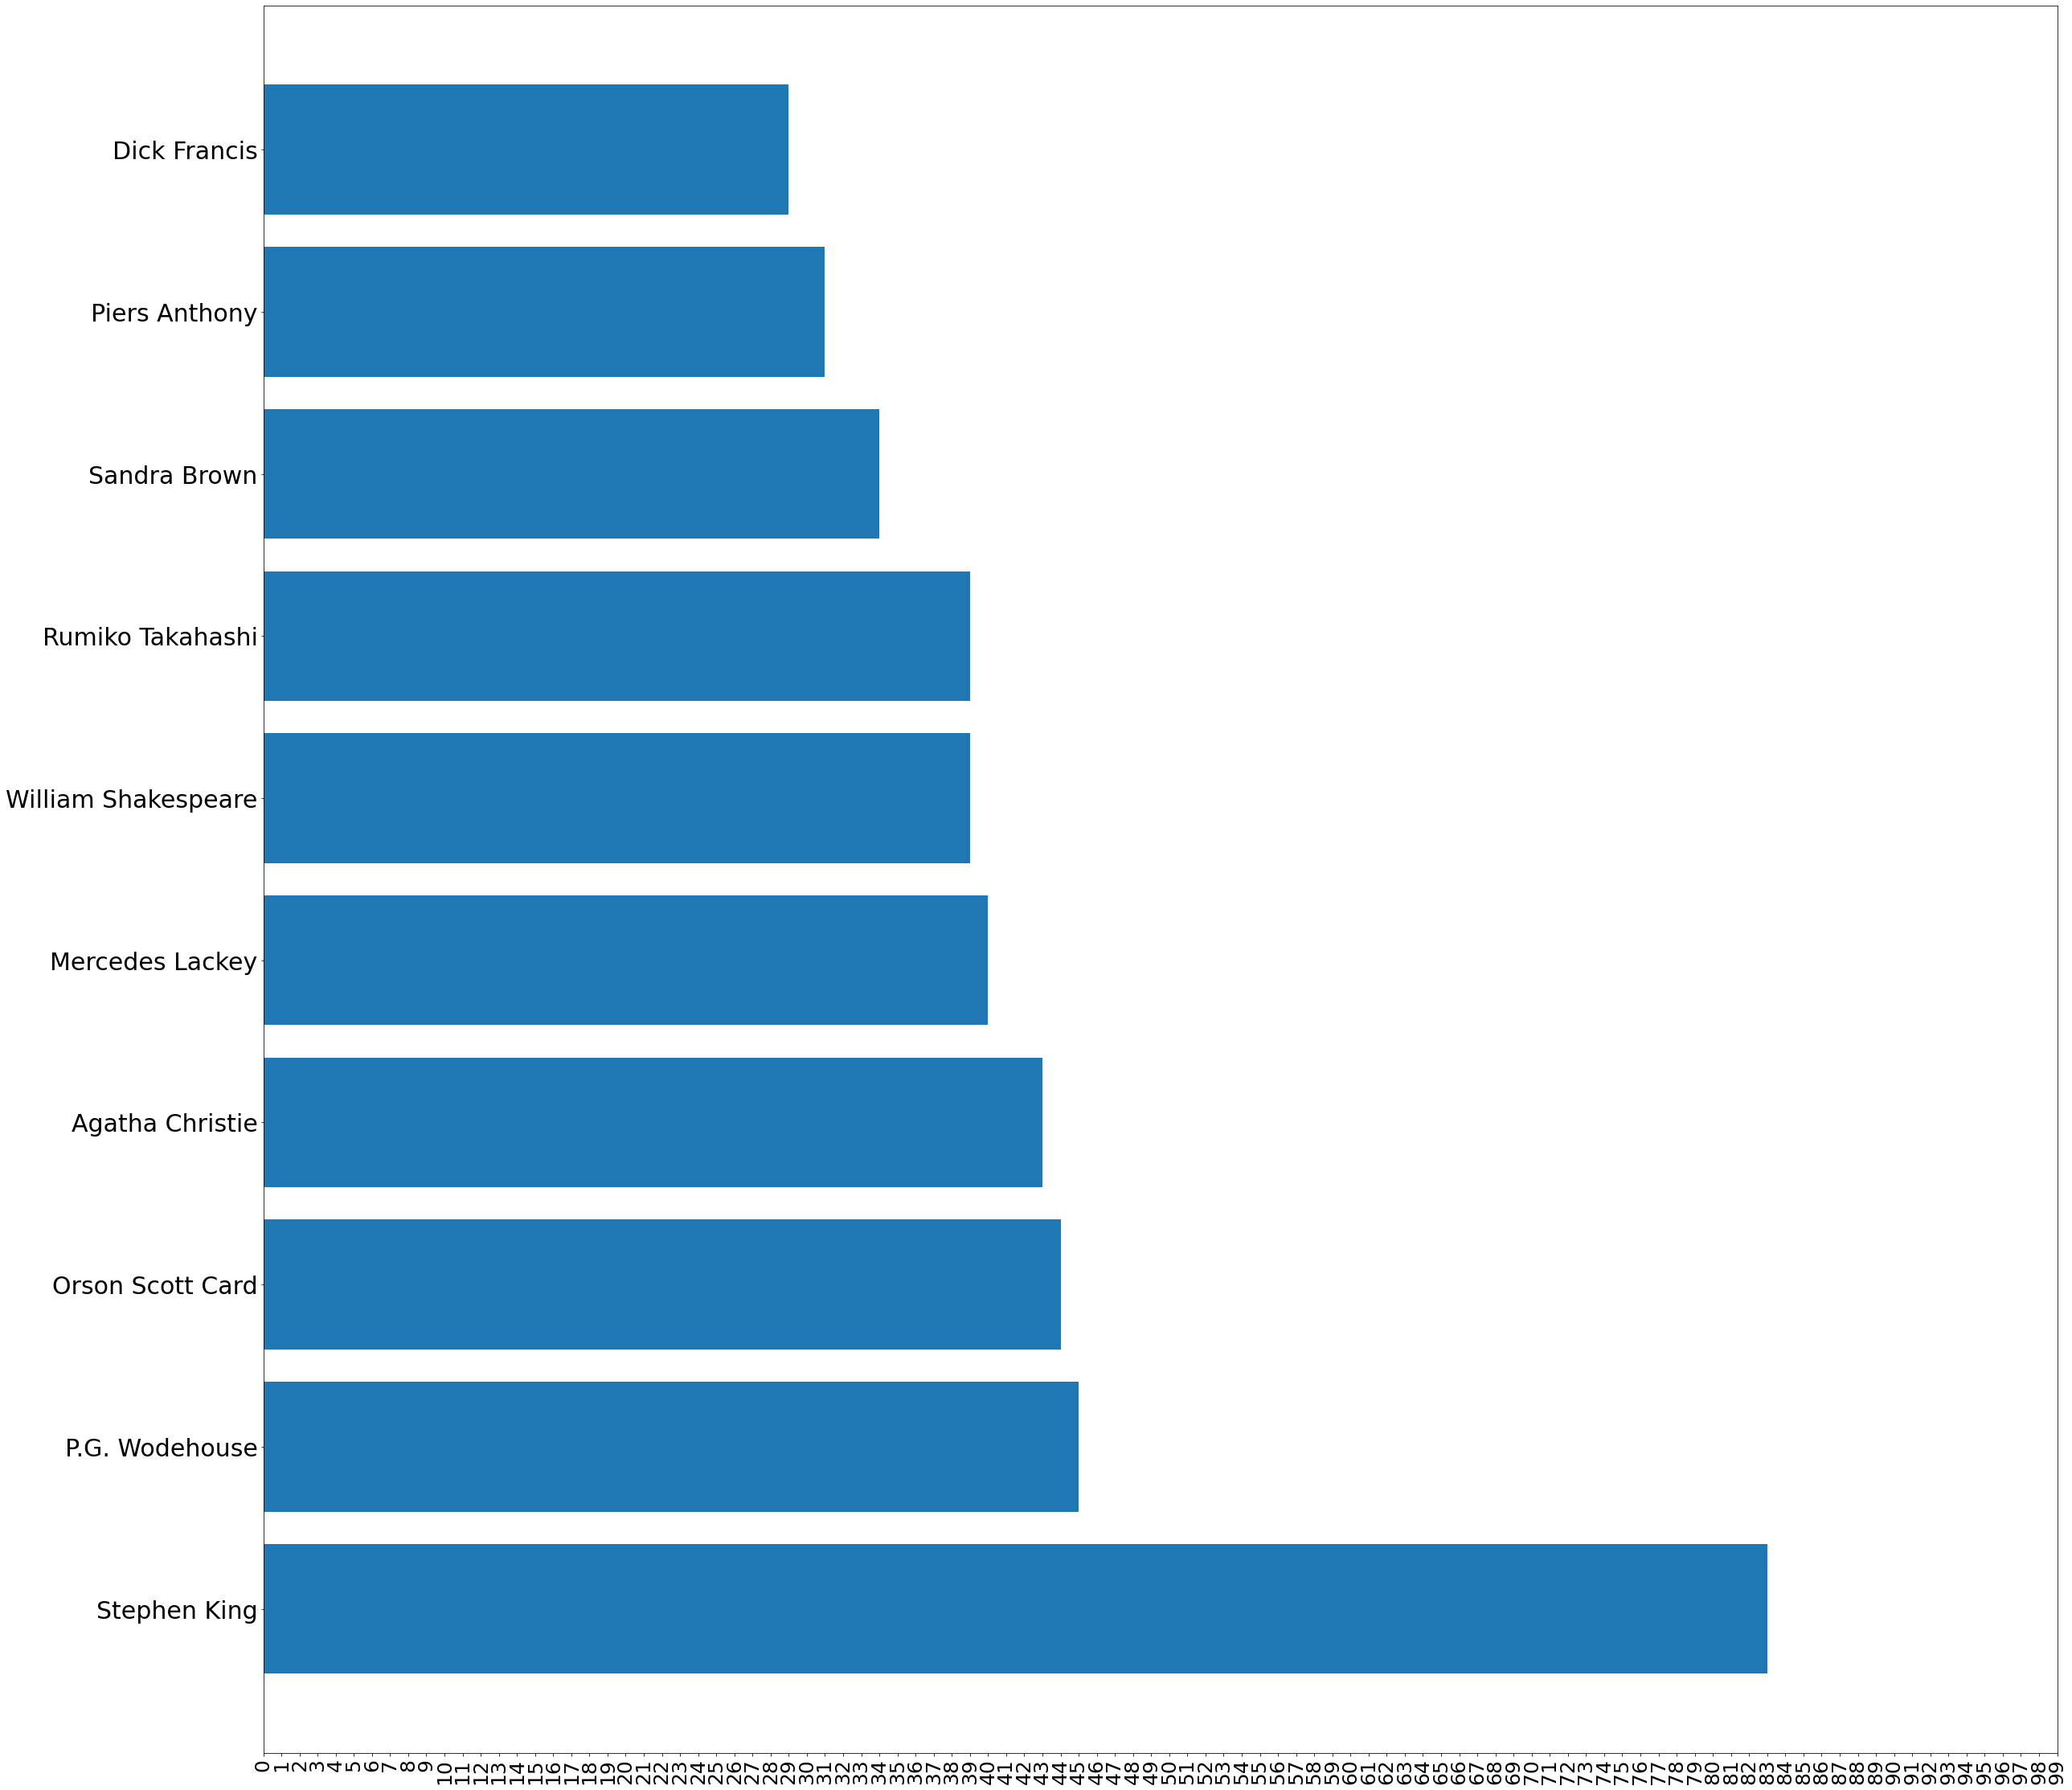

In [184]:
plt.figure(figsize=(40, 40));
plt.barh(range(10), list(get_books.values())[:10], align='center')
plt.yticks(range(10), list(get_books.keys())[:10], fontsize=30)
plt.xticks(range(100), range(100), fontsize=25, rotation=90)
plt.show();

In [185]:
import datetime

In [186]:
dates = []
for x in rsv.publication_date.values:
    try:
        dates.append(pd.to_datetime(datetime.datetime.strptime(x,"%m/%d/%Y")))
    except:
        dates.append(pd.to_datetime(datetime.datetime.now()))

In [187]:
rsv["New dates"] = dates

## Incorrect dates
As you can see only 2 dates are incorrect in the dateset which can effect the anaylsis

In [188]:
rsv.sort_values(by='New dates',ascending=False).loc[:,("title","New dates")]

,title,New dates
11094,Montaillou village occitan de 1294 à 1324,2021-01-11 22:43:23.252141
8177,In Pursuit of the Proper Sinner (Inspector Lyn...,2021-01-11 22:43:23.028898
9664,A Quick Bite (Argeneau #1),2020-03-31 00:00:00.000000
10335,American Genesis: Captain John Smith and the F...,2019-08-17 00:00:00.000000
3981,The Art of Loving,2019-08-06 00:00:00.000000
...,...,...
7141,The Library 1 Books 1-3.9,1921-01-01 00:00:00.000000
435,History of the Peloponnesian War: Bk. 1-2,1919-01-01 00:00:00.000000
6816,Agricola / Germania / Dialogue on Oratory,1914-01-01 00:00:00.000000
6488,On Duties (De Officiis),1913-01-01 00:00:00.000000


In [189]:
rsv["Rating_Interval"] = pd.DataFrame(pd.cut(rsv.average_rating, 5, [0.0,1.0,2.0,3.0,4.0,5.0]))

In [190]:
ratings = dict()
for i in range(0,5,1):
    ratings[str(i)+" to "+str(i+1)] = (rsv["Rating_Interval"] == pd.Interval(left = float(i), right = float(i+1))).sum()

In [191]:
del ratings['0 to 1']

In [192]:
ratings

{'1 to 2': 7, '2 to 3': 69, '3 to 4': 6285, '4 to 5': 4735}

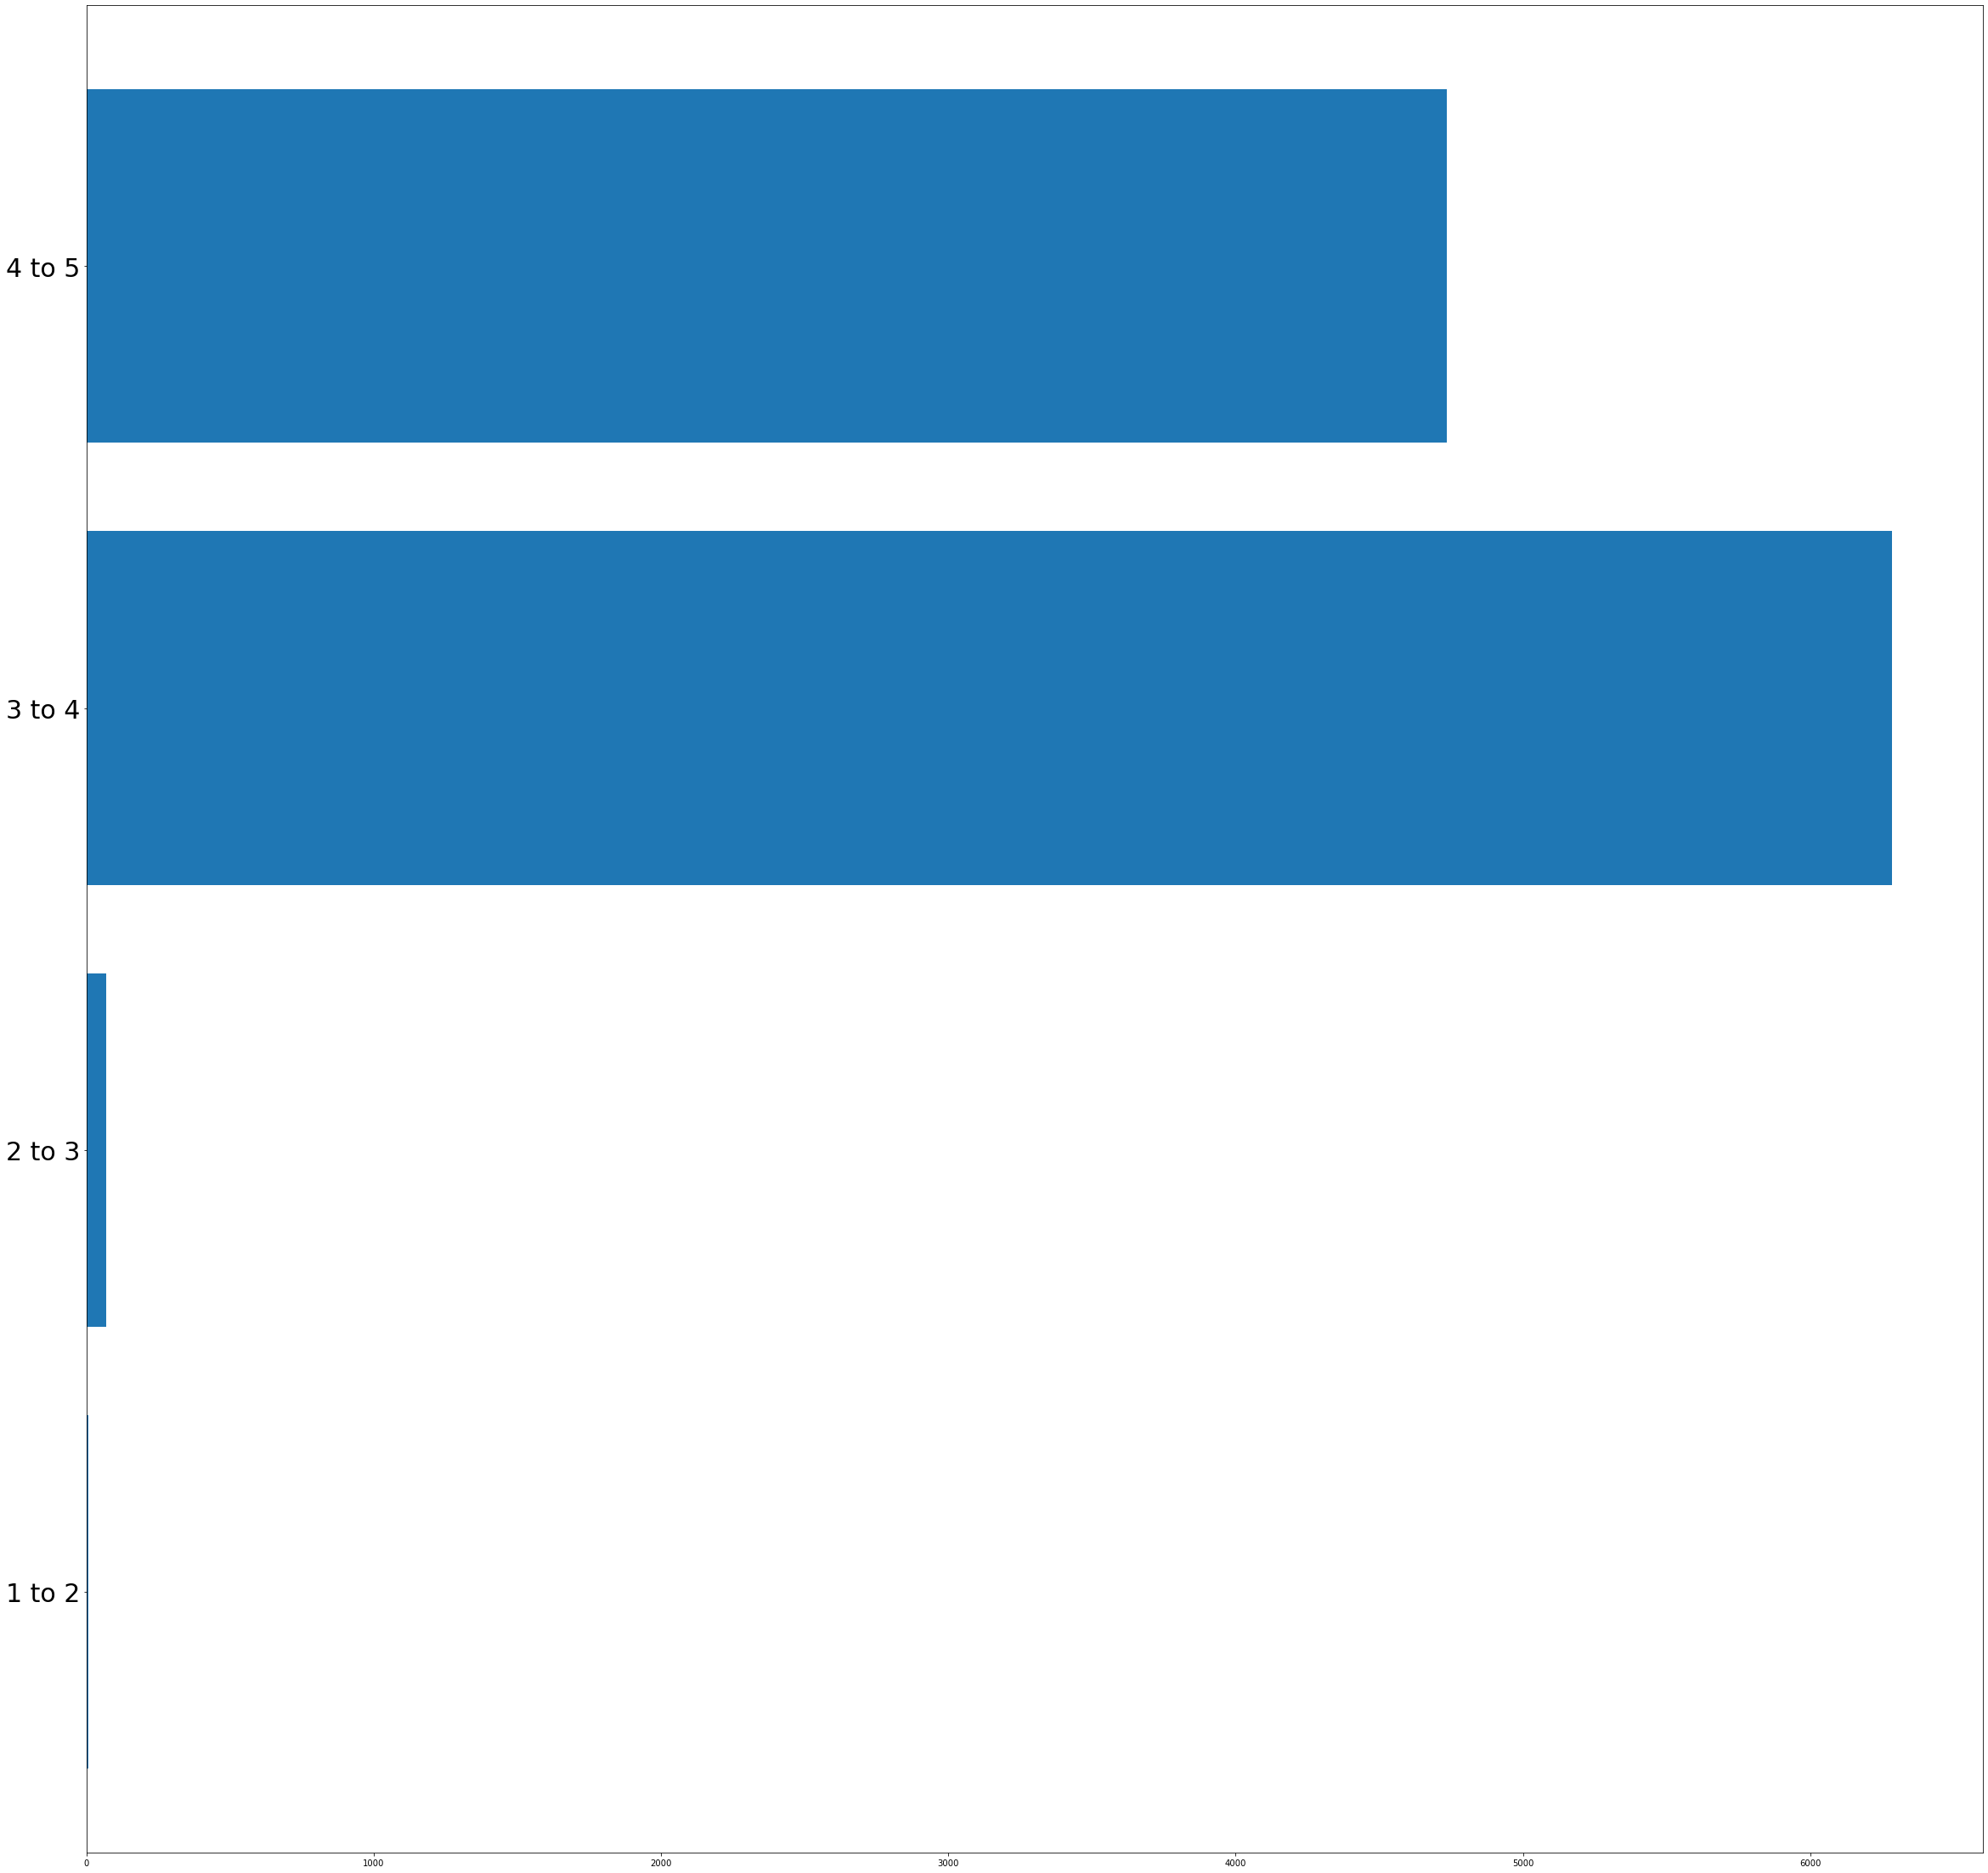

In [193]:
plt.figure(figsize=(40, 40));
plt.barh(range(len(ratings)), list(ratings.values()), align='center')
plt.yticks(range(len(ratings)), list(ratings.keys()), fontsize=30)
# plt.yticks(range(50), range(50), fontsize=30)
plt.show();

## Ratings
From the above graph we can clearly see that the dominating rating is
3 to 4, moreover the average lies between 3 to 4.
This is skewed data, as well an indication that the 
dataset given has more 3 to 5 star books within the sample

In [194]:
lang = dict()

In [195]:
rsv.language_code.unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla',
       'ale'], dtype=object)

In [196]:
lang["eng"] = 0

In [197]:
skip = ["eng","en-US","en-CA","en-GB"]

In [198]:
unq_lang = rsv.language_code.unique()

In [199]:
for x in unq_lang:
    if x not in skip:
        lang[x] = rsv[rsv.language_code == x].bookID.count()
    if x in skip:
        lang["eng"]+=rsv[rsv.language_code == x].bookID.count()

In [200]:
lang

{'eng': 10537,
 'fre': 144,
 'spa': 218,
 'mul': 19,
 'grc': 11,
 'enm': 3,
 'ger': 99,
 'jpn': 46,
 'ara': 1,
 'nl': 1,
 'zho': 14,
 'lat': 3,
 'por': 10,
 'srp': 1,
 'ita': 5,
 'rus': 2,
 'msa': 1,
 'glg': 1,
 'wel': 1,
 'swe': 2,
 'nor': 1,
 'tur': 1,
 'gla': 1,
 'ale': 1}

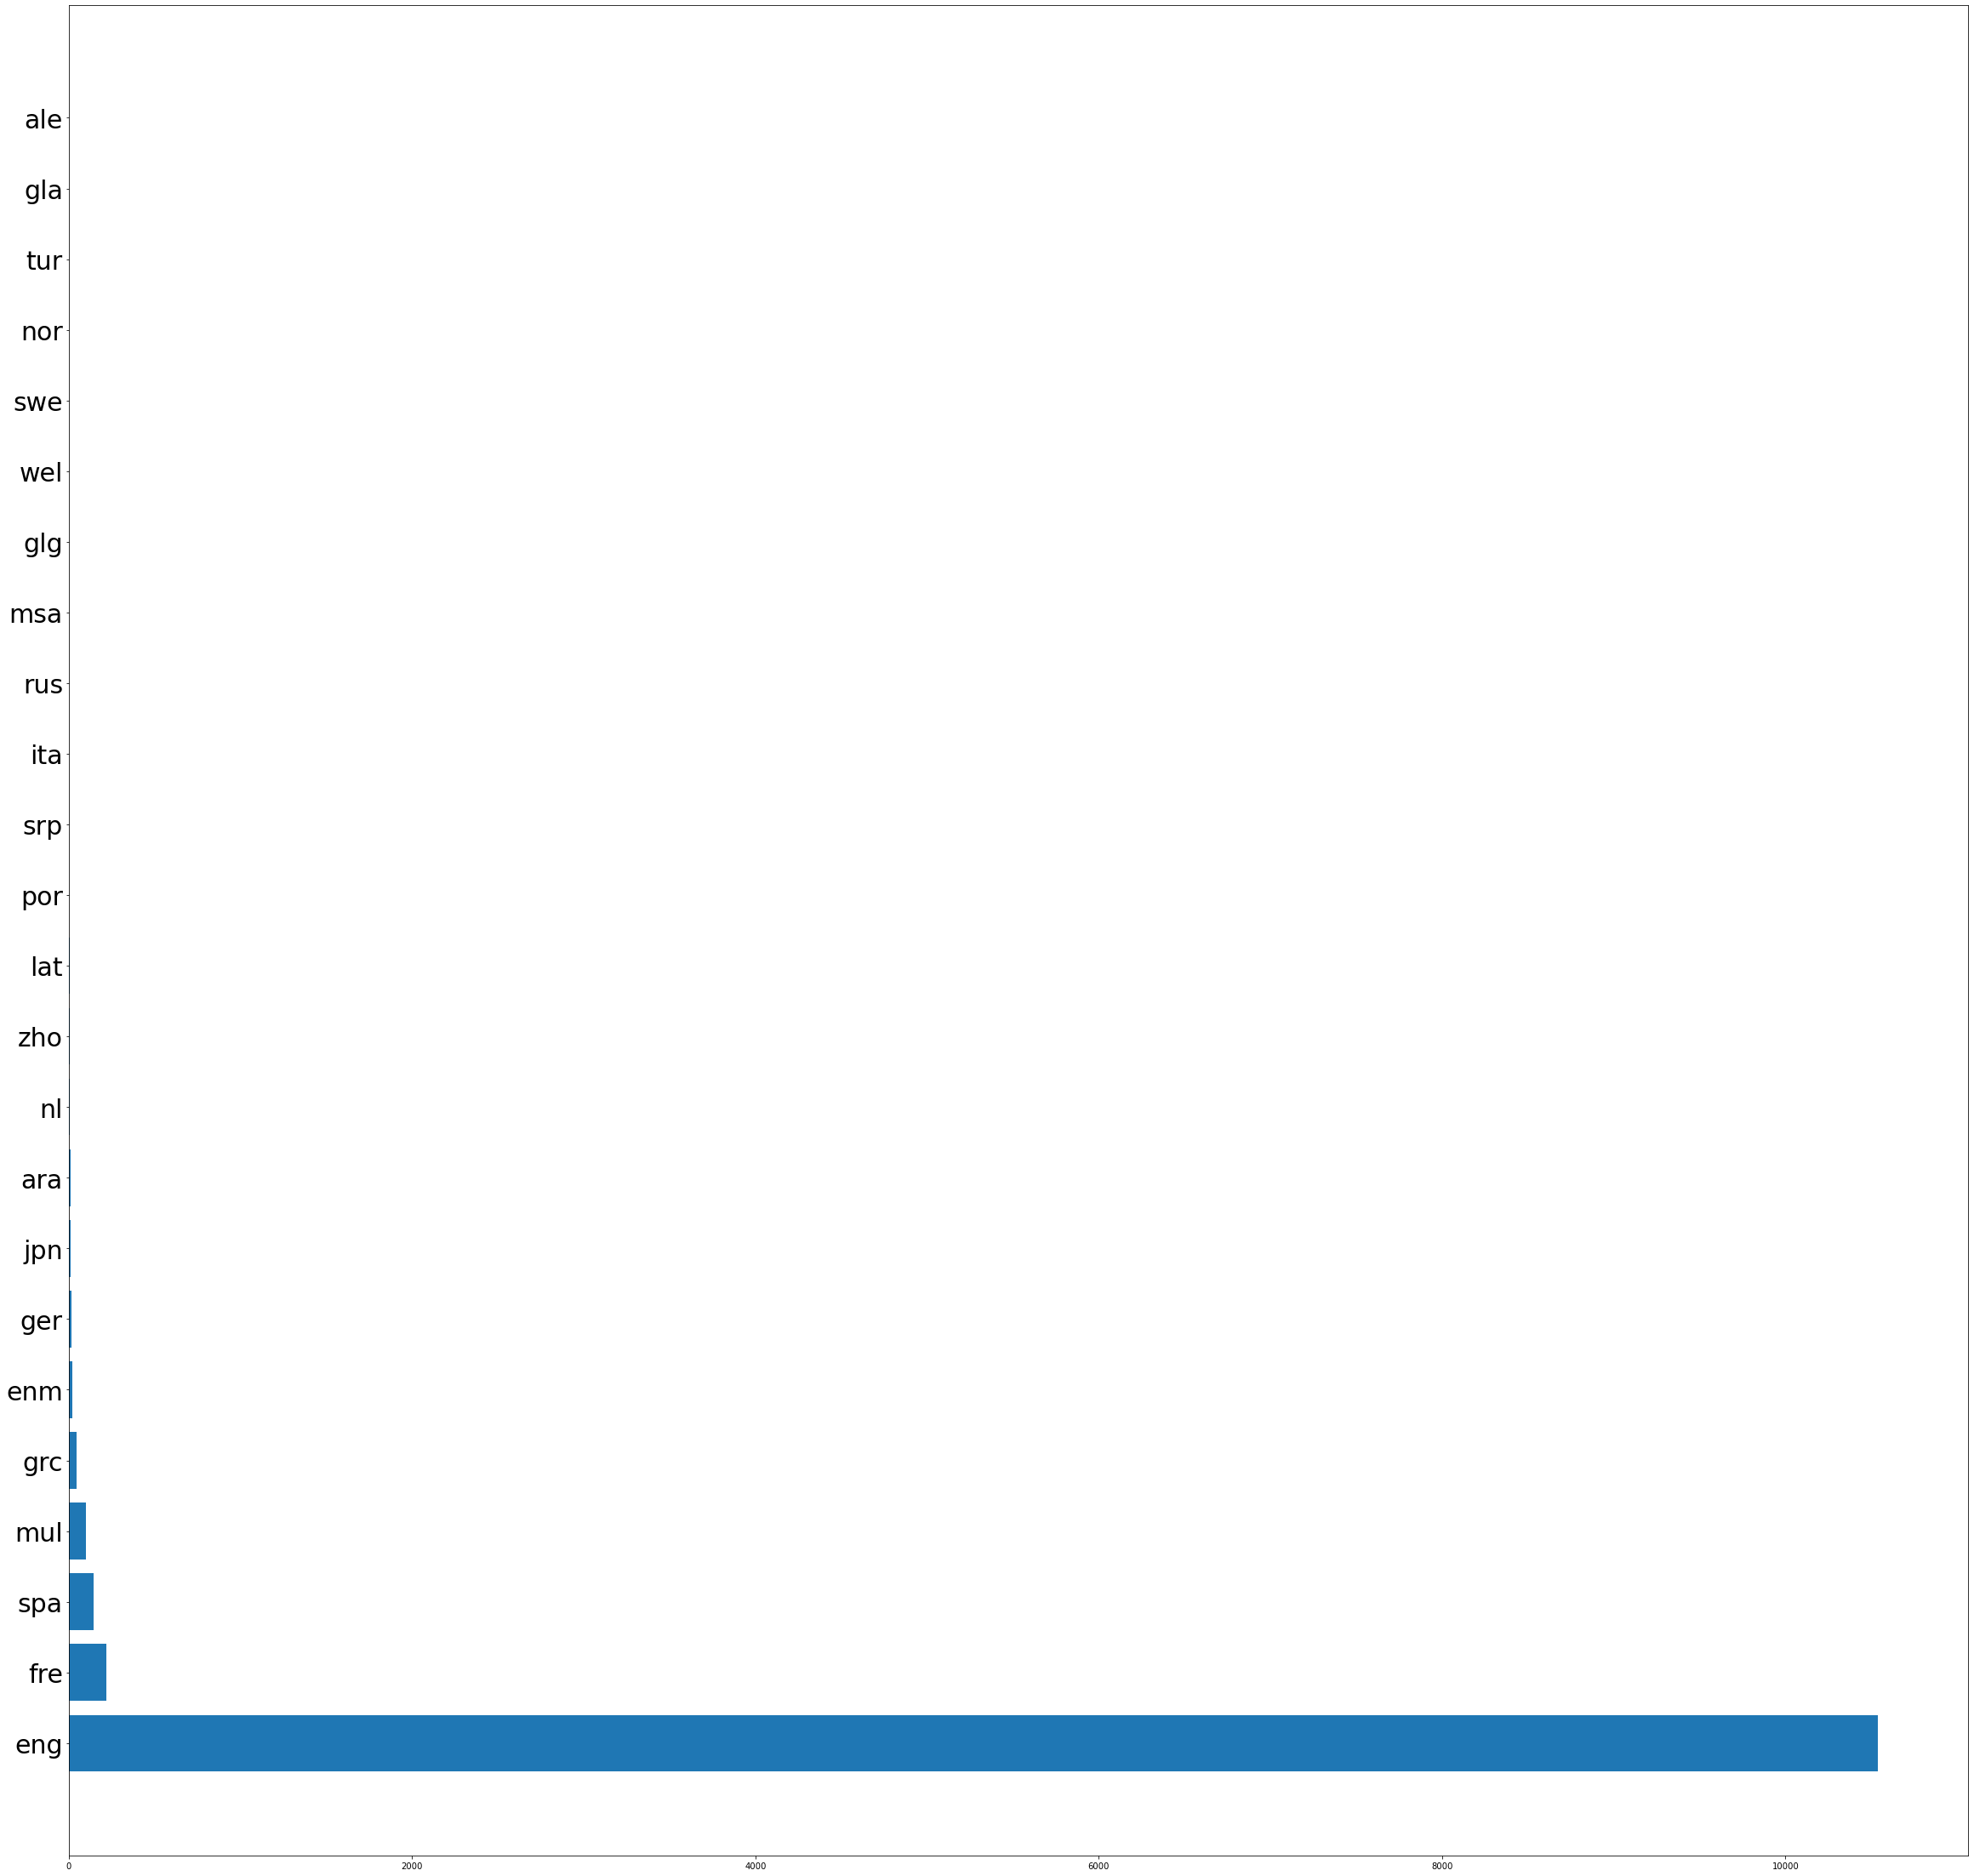

In [201]:
plt.figure(figsize=(40, 40))
plt.barh(range(len(lang)), width=sorted(list(lang.values()))[::-1], align='center')
plt.yticks(range(len(lang)), list(lang.keys()), fontsize=30)
plt.show();

## Observing Above graph
English is most dominating language,
but in the next bar graph Down below if
English is removed we see graph looks normal
and not totally dominant by a single language

In [202]:
del lang["eng"]

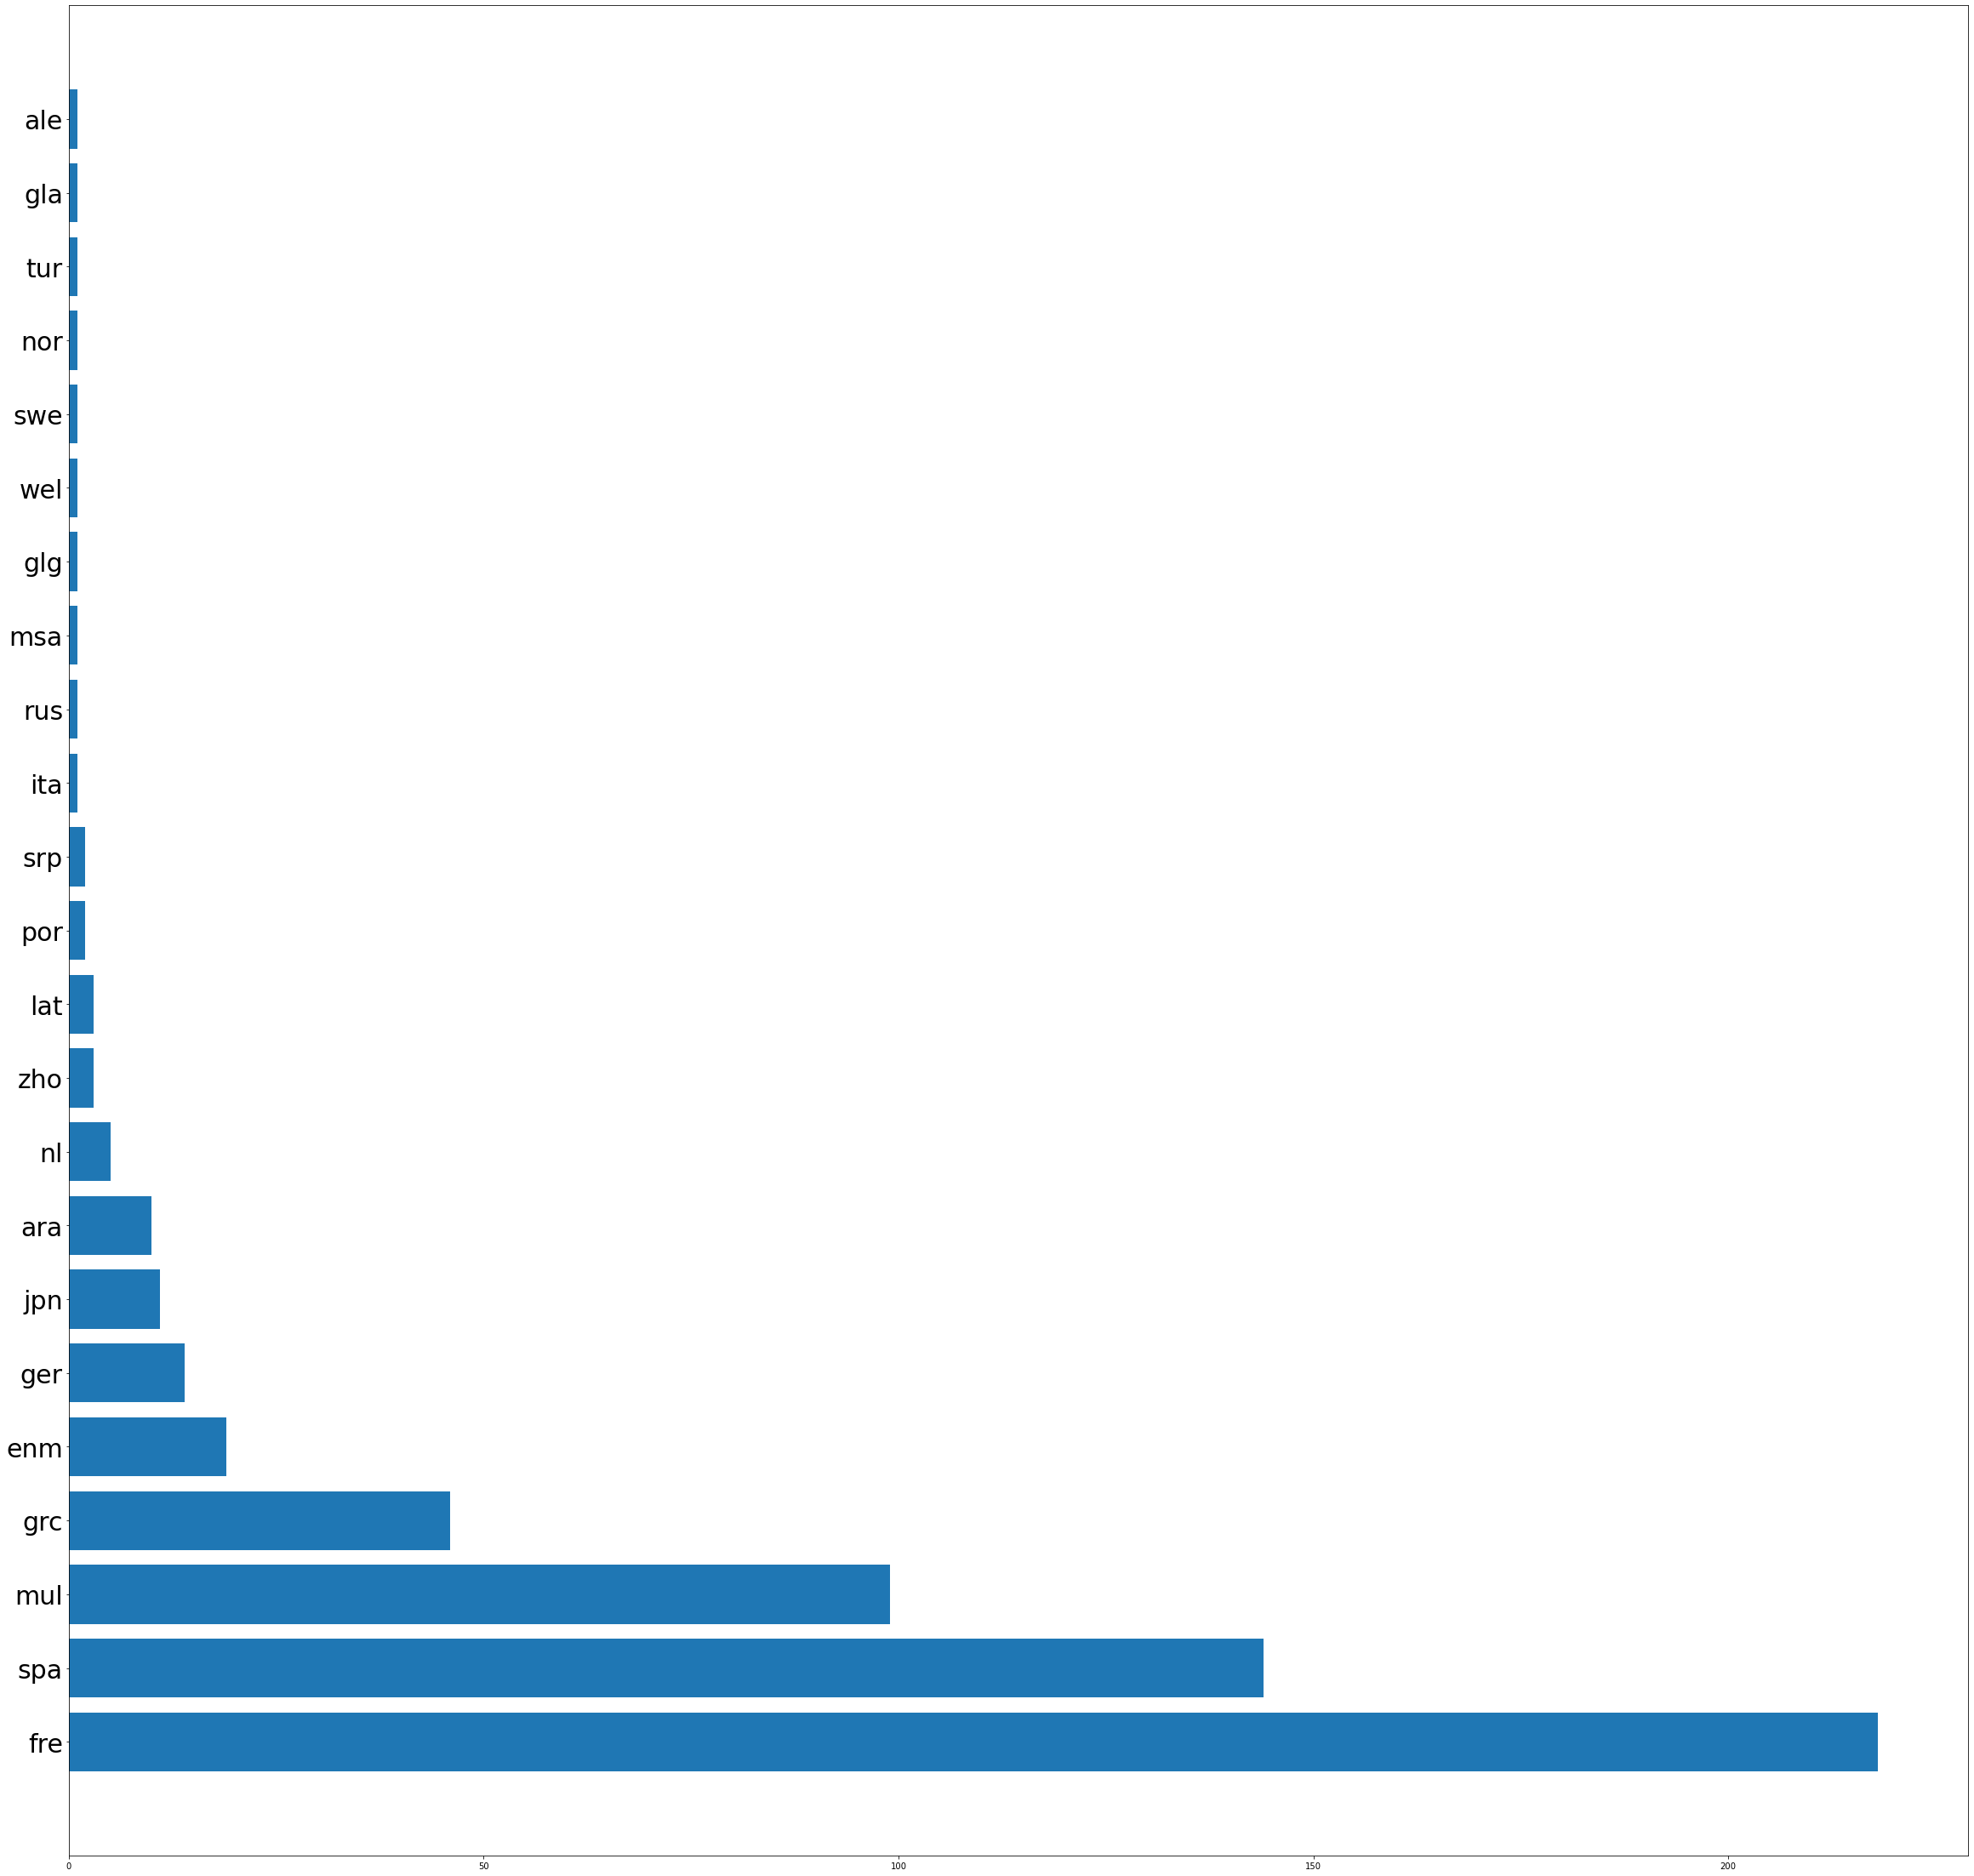

In [203]:
plt.figure(figsize=(40, 40))
plt.barh(range(len(lang)), width = sorted(list(lang.values()))[::-1], align='center')
plt.yticks(range(len(lang)), list(lang.keys()), fontsize=30)
plt.show();

In [204]:
rsv = rsv.set_index('bookID')

In [205]:
rsv

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,New dates,Rating_Interval
bookID,,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006-09-16,"(4.0, 5.0]"
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004-09-01,"(4.0, 5.0]"
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,2003-11-01,"(4.0, 5.0]"
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004-05-01,"(4.0, 5.0]"
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,2004-09-13,"(4.0, 5.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press,2004-12-21,"(4.0, 5.0]"
45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books,1988-12-01,"(4.0, 5.0]"
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books,1993-08-01,"(3.0, 4.0]"


# Wrong dates
BookId
45531
31373

In [206]:
rsv = rsv.drop([45531, 31373])

In [207]:
l = rsv.publisher.value_counts()
l = l[l >= 20]

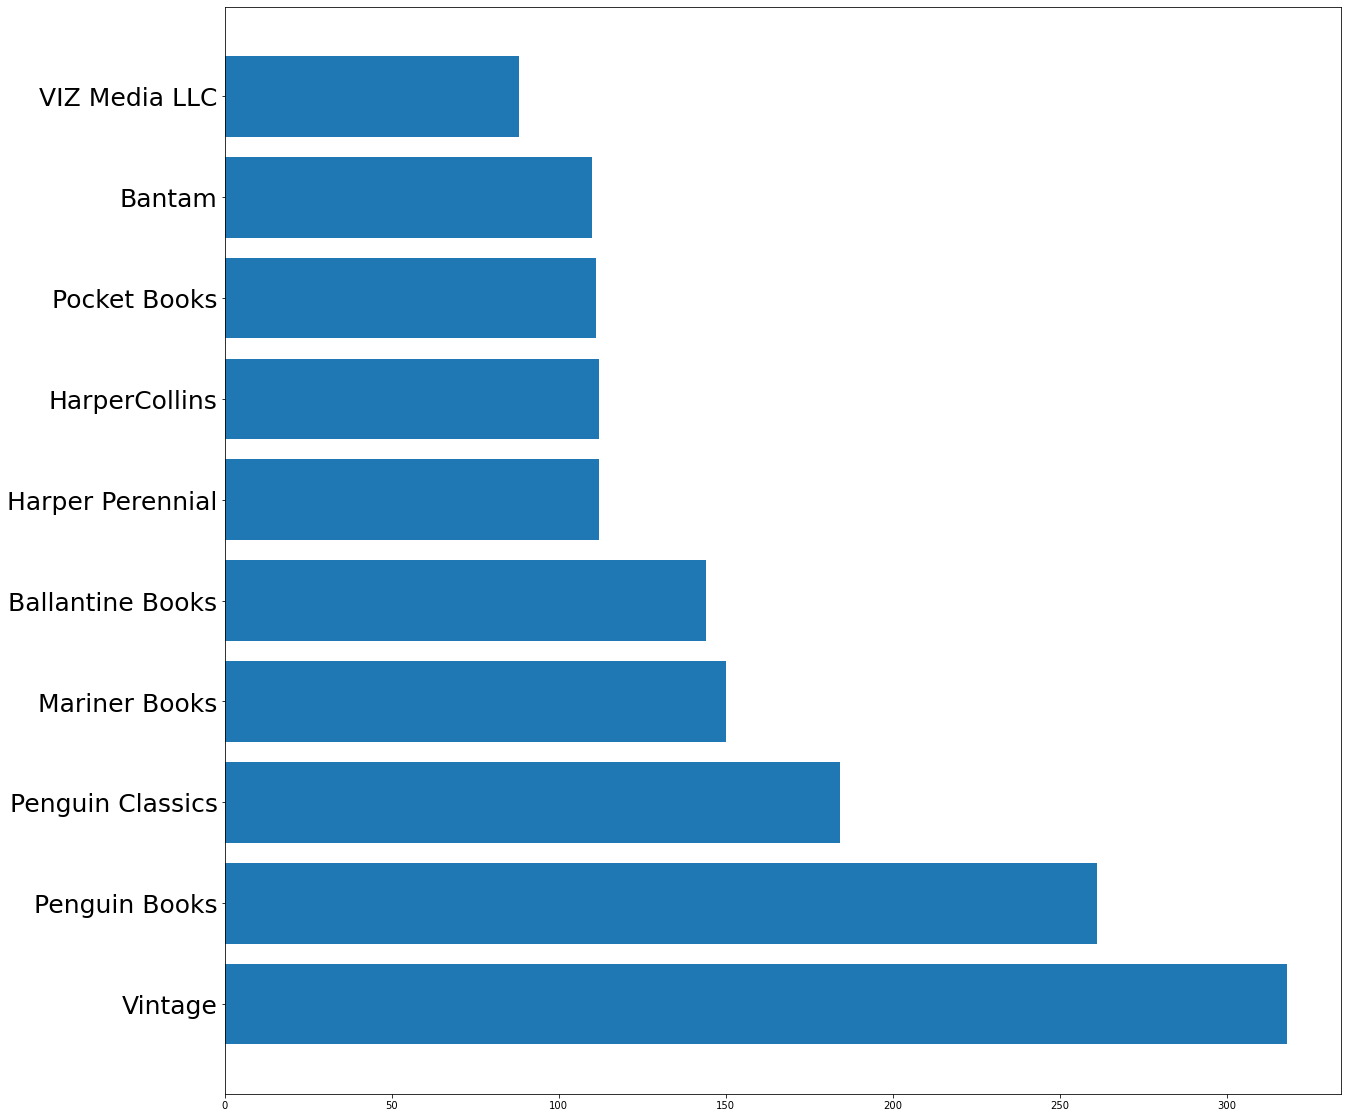

In [208]:
plt.figure(figsize=(20, 20))
plt.barh(range(10), width=l[:10])
plt.yticks(range(10), l.index.values[:10], fontsize= 25)
plt.show()

In [209]:
def calculate(word):
    return ord(word)

In [210]:
def encode(strs):
    if '/' in strs:
        final_sum = 0
        intr = strs.split('/')
        for s in intr:
            noramlize = len(s)
            summation = sum([calculate(x) for x in s])
        final_sum+=(summation/noramlize)
        return final_sum
    else:
        return sum([calculate(x) for x in strs])/len(strs)

In [211]:
rsv.insert(2,'Encoded authors', rsv.authors.apply(encode))

In [212]:
encode(rsv.authors.values[0])

104.61538461538461

In [213]:
import math

In [214]:
def encode_title(tt):
    total = 0
    for w in tt.split(' '):
        if len(w) == 0:
            continue
        total+= sum([calculate(x)*math.log2(lg + len(w)) for lg,x in enumerate(w)])/ len(w)
    return total/len(tt)

In [215]:
l = []
for x in rsv.title.values:
    l.append(encode(x))

In [216]:
len(l), len(set(l))

(11121, 6656)

In [217]:
rsv.insert(1,'Encoded_titles',rsv.title.apply(encode_title)/rsv.average_rating.values)

In [218]:
rsv.head()

,title,Encoded_titles,authors,Encoded authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,New dates,Rating_Interval
bookID,,,,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,9.223224,J.K. Rowling/Mary GrandPré,104.615385,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006-09-16,"(4.0, 5.0]"
2,Harry Potter and the Order of the Phoenix (Har...,10.068398,J.K. Rowling/Mary GrandPré,104.615385,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004-09-01,"(4.0, 5.0]"
4,Harry Potter and the Chamber of Secrets (Harry...,9.922389,J.K. Rowling,84.250000,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,2003-11-01,"(4.0, 5.0]"
5,Harry Potter and the Prisoner of Azkaban (Harr...,9.564367,J.K. Rowling/Mary GrandPré,104.615385,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004-05-01,"(4.0, 5.0]"
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,8.636698,J.K. Rowling/Mary GrandPré,104.615385,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,2004-09-13,"(4.0, 5.0]"


In [219]:
rsv[rsv.isna() == False]

,title,Encoded_titles,authors,Encoded authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,New dates,Rating_Interval
bookID,,,,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,9.223224,J.K. Rowling/Mary GrandPré,104.615385,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006-09-16,"(4.0, 5.0]"
2,Harry Potter and the Order of the Phoenix (Har...,10.068398,J.K. Rowling/Mary GrandPré,104.615385,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004-09-01,"(4.0, 5.0]"
4,Harry Potter and the Chamber of Secrets (Harry...,9.922389,J.K. Rowling,84.250000,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,2003-11-01,"(4.0, 5.0]"
5,Harry Potter and the Prisoner of Azkaban (Harr...,9.564367,J.K. Rowling/Mary GrandPré,104.615385,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004-05-01,"(4.0, 5.0]"
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,8.636698,J.K. Rowling/Mary GrandPré,104.615385,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,2004-09-13,"(4.0, 5.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,10.048843,William T. Vollmann/Larry McCaffery/Michael He...,98.222222,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press,2004-12-21,"(4.0, 5.0]"
45633,You Bright and Risen Angels,12.022620,William T. Vollmann,92.210526,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books,1988-12-01,"(4.0, 5.0]"
45634,The Ice-Shirt (Seven Dreams #1),9.939040,William T. Vollmann,92.210526,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books,1993-08-01,"(3.0, 4.0]"


# Constructing x
For KMeans

In [220]:
rsv.columns

Index(['title', 'Encoded_titles', 'authors', 'Encoded authors',
       'average_rating', 'isbn', 'isbn13', 'language_code', '  num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'New dates', 'Rating_Interval'],
      dtype='object')

In [221]:
x = rsv[['Encoded_titles', 'Encoded authors', 'average_rating', '  num_pages','ratings_count','text_reviews_count', 'New dates']]

In [222]:
x

,Encoded_titles,Encoded authors,average_rating,num_pages,ratings_count,text_reviews_count,New dates
bookID,,,,,,,
1,9.223224,104.615385,4.57,652,2095690,27591,2006-09-16
2,10.068398,104.615385,4.49,870,2153167,29221,2004-09-01
4,9.922389,84.250000,4.42,352,6333,244,2003-11-01
5,9.564367,104.615385,4.56,435,2339585,36325,2004-05-01
8,8.636698,104.615385,4.78,2690,41428,164,2004-09-13
...,...,...,...,...,...,...,...
45631,10.048843,98.222222,4.06,512,156,20,2004-12-21
45633,12.022620,92.210526,4.08,635,783,56,1988-12-01
45634,9.939040,92.210526,3.96,415,820,95,1993-08-01


In [223]:
x['New dates'] = x['New dates'].astype(np.int64)

<ipython-input-223-98942ba089f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['New dates'] = x['New dates'].astype(np.int64)


In [224]:
x['New dates'].astype(np.float64)

bookID
1        1.158365e+18
2        1.093997e+18
4        1.067645e+18
5        1.083370e+18
8        1.095034e+18
             ...     
45631    1.103587e+18
45633    5.969376e+17
45634    7.441632e+17
45639    1.172534e+18
45641    1.148774e+18
Name: New dates, Length: 11121, dtype: float64

In [225]:
from sklearn.cluster import KMeans

In [226]:
x = x.reset_index()

In [227]:
x = x.drop('bookID',axis=1)

In [230]:
x['New dates'] = x['New dates'] //  10**12

wcss = []
for i in range(1,11):
    clusters = KMeans(n_clusters = i, random_state = 42)
    clusters.fit(x.values)
    wcss.append(clusters.inertia_)

plt.plot(range(1,11),wcss,'b')
plt.title('This is Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.plot(5,wcss[4],'.',mew = 4, ms =8,color = 'r')
plt.annotate(xy = [5,wcss[4]],s='(%.2f , %.1f) Seems to be Optimal'%(5,wcss[4]))
plt.vlines(5,0,wcss[4],linestyle='dashed')
plt.hlines(wcss[4],0,5,linestyle='dashed')
plt.xlim(0,None)
plt.ylim(0,None)
plt.show()